In [1]:
# IO
import os
from glob import glob

# Data
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import cmcrameri  # nice colormaps
import astropy.units as u

In [2]:
from thesis.io import mesa, gyre, fgong
from thesis.physics import first_adiabatic_exponent, sound_speed, acoustic_depth, structure_kernels
from thesis.calculus import differentiate

In [3]:
root_path = "/Users/ajl573/OneDrive/Data/MESA/solar_models/y0.28/"
profile_name = "profile"

In [4]:
filename = os.path.join(root_path, ".".join([profile_name, "data"]))
profile = mesa.load_mesa(filename)
profile

<xarray.Dataset>
Dimensions:                 (zone: 763)
Coordinates:
  * zone                    (zone) int64 1 2 3 4 5 6 ... 758 759 760 761 762 763
Data variables:
    mass                    (zone) float64 1.0 1.0 1.0 ... 1.563e-07 7.813e-08
    logR                    (zone) float64 0.006006 0.006005 ... -2.936 -3.036
    logT                    (zone) float64 3.755 3.756 3.757 ... 7.19 7.19 7.19
    logRho                  (zone) float64 -6.788 -6.782 -6.776 ... 2.151 2.151
    logP                    (zone) float64 4.783 4.79 4.798 ... 17.35 17.35
    x_mass_fraction_H       (zone) float64 0.7304 0.7304 ... 0.3762 0.3762
    y_mass_fraction_He      (zone) float64 0.2515 0.2515 ... 0.6027 0.6027
    z_mass_fraction_metals  (zone) float64 0.0181 0.0181 ... 0.02109 0.02109
    acoustic_depth          (zone) float64 0.0 0.2495 ... 3.601e+03 3.601e+03
    pp                      (zone) float64 2.602e-26 2.638e-26 ... 15.44 15.44
    cno                     (zone) float64 0.0 0.0 0.0 0.0 ... 1.441 1.441 1.442
    tri_alpha               (zone) float64 0.0 0.0 0.0 ... 8.281e-41 8.287e-41
Attributes: (12/49)
    model_number:            211
    num_zones:               763
    initial_mass:            1.0
    initial_z:               0.02
    star_age:                4073344465.7814794
    time_step:               116394271.99836661
    ...                      ...
    MESA_SDK_version:        "x86_64-linux-22.6.1"
    math_backend:            "CRMATH"
    date:                    "20230119"
    msun:                    1.9884098706980504e+33
    rsun:                    69570000000.0
    lsun:                    3.828e+33

In [5]:
filename = os.path.join(root_path, ".".join([profile_name, "data", "FGONG"]))
gong = fgong.load_fgong(filename)
gong

<xarray.Dataset>
Dimensions:       (x: 1046)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
Data variables: (12/36)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    X_Li7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Be7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_N15         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O17         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O18         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Ne20        (x) float64 0.002143 0.002143 0.002143 ... 0.001851 0.001851
Attributes: (12/15)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    lambda_surf:     0.0
    d2lnPc_dlnr2:    -125.502754776413
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08

In [6]:
summary_filename = os.path.join(root_path, profile_name, "summary.h5")
detail_filenames = glob(os.path.join(root_path, profile_name, "detail*"))

pulse = gyre.load_output(summary_filename, detail_filenames)
pulse

<xarray.Dataset>
Dimensions:  (n_pg: 36, l: 3, x: 1046)
Coordinates:
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * l        (l) int64 0 1 2
  * x        (x) float64 0.0 0.0009072 0.001143 0.00144 ... 1.001 1.001 1.001
Data variables:
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    freq     (n_pg, l) complex128 (255.42893986791924+0j) ... (nan+nanj)
    omega    (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As       (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2      (x, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
    xi_r     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
Attributes:
    freq_units:  UHZ
    label:

## First Adiabatic Exponent

Using model from Houdeyer et al. (2021).

In [7]:
n = 101
log_T_range = (3.5, 6.0)
log_rho_range = (-12.0, 0.0)
log_T = np.linspace(*log_T_range, n)
log_rho = np.linspace(*log_rho_range, n)

log_coords = np.meshgrid(log_T, log_rho)
coords = np.power(10, log_coords)

In [8]:
Y = gong.X_He4[-1].values
gamma1_grid = first_adiabatic_exponent(*coords.reshape((2, n**2)), Y)
gamma1_at_coords = gamma1_grid.reshape((n, n))

In [9]:
def latex_inline(unit):
    return unit.to_string("latex_inline")

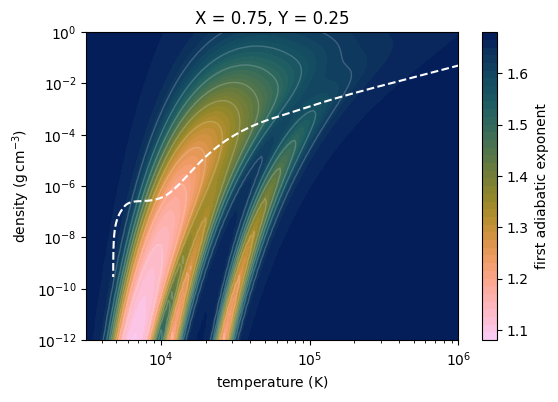

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

cf = ax.contourf(*coords, gamma1_at_coords, levels=51, cmap="cmc.batlow_r")

ax.contour(*coords, gamma1_at_coords, levels=9, colors="white", alpha=0.2, linewidths=1.0)

ax.plot(gong.T, gong.rho, "--", color="white")

ax.set_xlabel(f"temperature ({latex_inline(u.K)})")
ax.set_ylabel(f"density ({latex_inline(u.g / u.cm**3)})")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(np.power(10, log_T_range))
ax.set_ylim(np.power(10, log_rho_range))

ax.set_title(f"X = {1 - Y:.2f}, Y = {Y:.2f}")

cbar = plt.colorbar(cf)
cbar.set_ticks(np.arange(1.1, 1.7, 0.1))
cbar.set_label("first adiabatic exponent");

## Pulsation profiles

In [11]:
gong["cs"] = sound_speed(gong.Gamma_1, gong.P, gong.rho)
gong["tau"] = acoustic_depth(gong.r, gong.cs)
gong

<xarray.Dataset>
Dimensions:       (x: 1046)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
Data variables: (12/38)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    X_N15         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O17         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O18         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Ne20        (x) float64 0.002143 0.002143 0.002143 ... 0.001851 0.001851
    cs            (x) float64 5.111e+07 5.111e+07 ... 7.165e+05 7.164e+05
    tau           (x) float64 3.71e+03 3.709e+03 3.709e+03 ... 0.3365 -1.364e-12
Attributes: (12/15)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    lambda_surf:     0.0
    d2lnPc_dlnr2:    -125.502754776413
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08

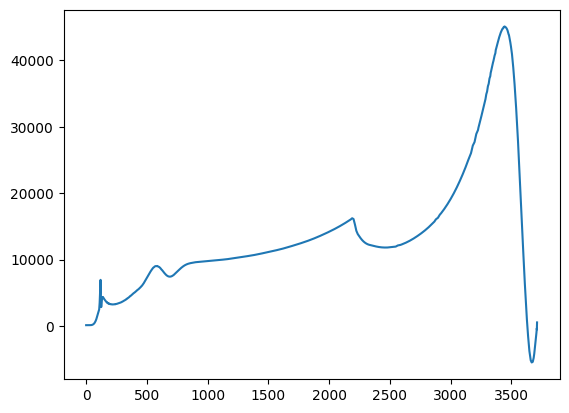

In [12]:
fig, ax = plt.subplots()

ax.plot(gong.tau, differentiate(gong.cs, gong.tau));

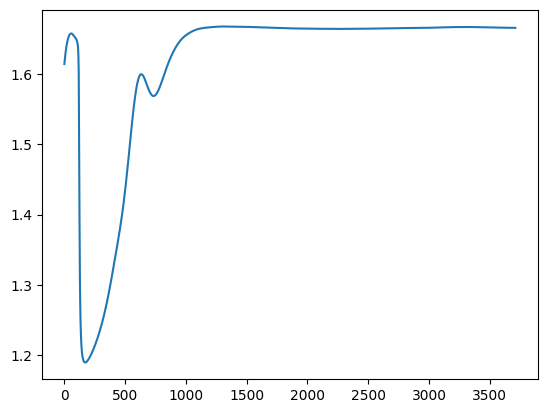

In [13]:
fig, ax = plt.subplots()

ax.plot(gong.tau, gong.Gamma_1);

How does this compare to that of the model from Houdeyer et al. (2021)

In [14]:
from scipy.interpolate import interp1d

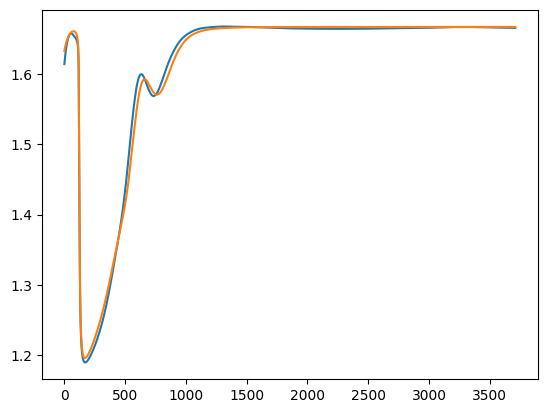

In [15]:
gamma1 = first_adiabatic_exponent(gong.T, gong.rho, gong.X_He4)

fig, ax = plt.subplots()

ax.plot(gong.tau, gong.Gamma_1);
ax.plot(gong.tau, gamma1);

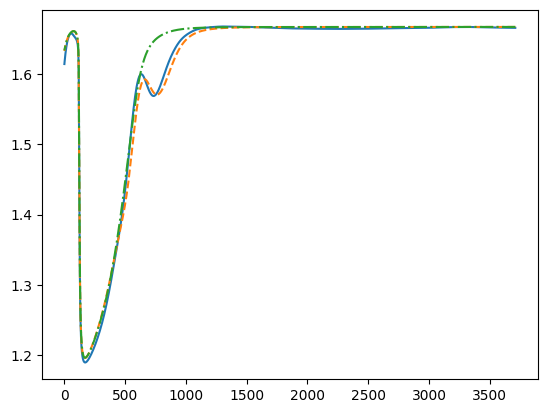

In [16]:
gamma1_0 = first_adiabatic_exponent(gong.T, gong.rho, 0.0)

fig, ax = plt.subplots()

ax.plot(gong.tau, gong.Gamma_1);
ax.plot(gong.tau, gamma1, "--");
ax.plot(gong.tau, gamma1_0, "-.");

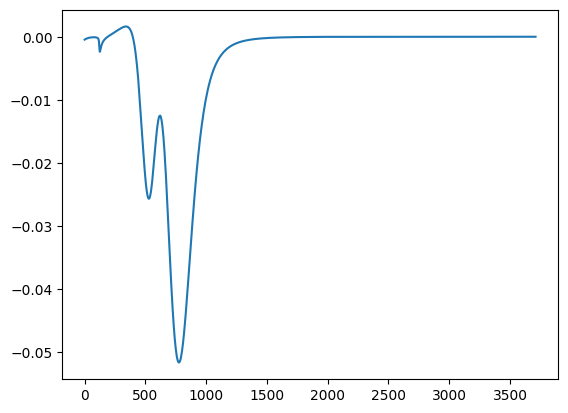

In [17]:
fig, ax = plt.subplots()

ax.plot(gong.tau, (gamma1 - gamma1_0) / gamma1);

In [18]:
pulse

<xarray.Dataset>
Dimensions:  (n_pg: 36, l: 3, x: 1046)
Coordinates:
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * l        (l) int64 0 1 2
  * x        (x) float64 0.0 0.0009072 0.001143 0.00144 ... 1.001 1.001 1.001
Data variables:
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    freq     (n_pg, l) complex128 (255.42893986791924+0j) ... (nan+nanj)
    omega    (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As       (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2      (x, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
    xi_r     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
Attributes:
    freq_units:  UHZ
    label:

In [19]:
model = gong.merge(pulse, combine_attrs="drop_conflicts")
model

<xarray.Dataset>
Dimensions:       (x: 1046, n_pg: 36, l: 3)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
  * n_pg          (n_pg) int64 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36
  * l             (l) int64 0 1 2
Data variables: (12/46)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    omega         (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As            (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2           (x, n_pg, l) float64 125.5 nan 125.5 ... 5.896e+03 nan nan
    c_1           (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
    xi_r          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
Attributes: (12/17)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08
    freq_units:      UHZ
    label:

In [24]:
K = structure_kernels(model)

In [25]:
def plot_kernels(K, l=0, n_pg=21, key="c2_rho"):
    subs = key.split("_")
    nrows = 2
    fig, axes = plt.subplots(nrows, figsize=(6, 8), sharex=True, gridspec_kw={"hspace": 0.1})

    for i in range(nrows):
        ax = axes[i]
        if K[key][i] is None:
            continue
        
        y = model.R*K[key][i].sel(n_pg=n_pg, l=l)
        ax.plot(model.tau, y)
        ax.set_ylabel(f"scaled kernel [{', '.join(subs[::1 if i==0 else -1])}]")
    ax.set_xlabel("acoustic depth (s)")
    return fig

The kernels show the sensitivity of omega to a change in structure. E.g. a change in sound speed squared at fixed density.

Or a change in density at fixed sound speed.

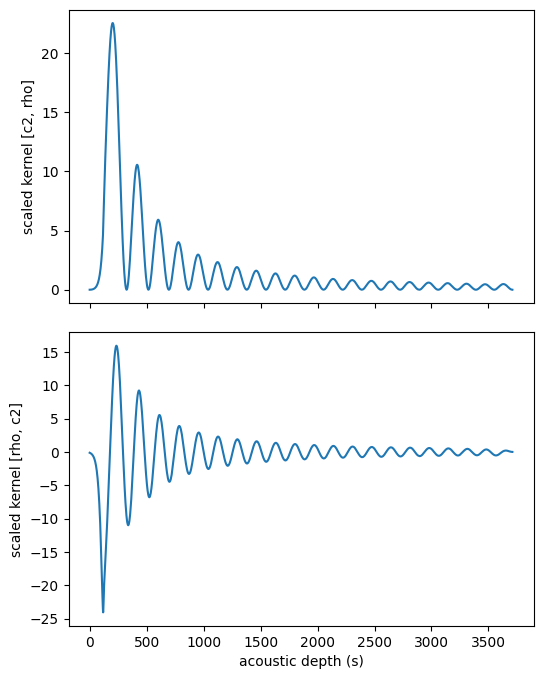

In [26]:
plot_kernels(K);

These would be integrated over to get the total change in omega due to changes in both sound speed and density. The latter would probably integrate out to zero, but the first would have a greater effect.

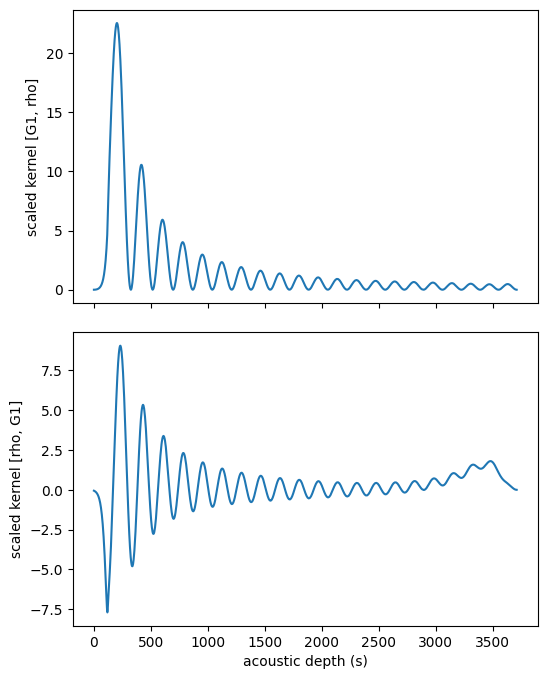

In [27]:
plot_kernels(K, key="G1_rho");

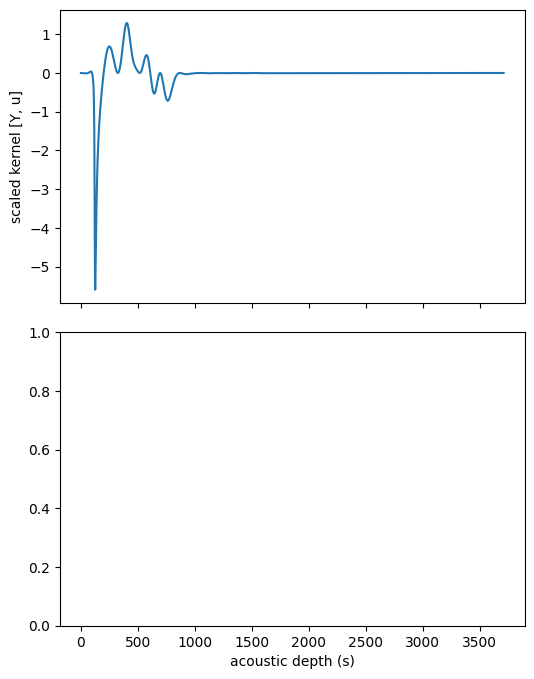

In [28]:
plot_kernels(K, key="Y_u");